# РК1

## Юрова Евгения Олеговна ИУ5-23М, Вариант 10.

### Задачи 10, 30.

# Задача 10

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import plotly.express as px
from sklearn.impute import SimpleImputer



In [4]:
df = pd.read_csv('Car Ownership.csv')

In [5]:
df

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


Найдем пропуски

In [6]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [19]:
draw_missing(df).round(1)

,Total,Percent
Number of Children,125,25.0
Years of Employment,43,8.6
Credit Score,40,8.0
Finance History,28,5.6
Finance Status,23,4.6
Car,20,4.0
Monthly Income,13,2.6
Occupation,10,2.0


In [11]:
cat_temp_data = df[['Finance Status']]
cat_temp_data.head()

,Finance Status
0,Good
1,Good
2,Fair
3,Excellent
4,Good


In [12]:
cat_temp_data['Finance Status'].unique()

array(['Good', 'Fair', 'Excellent', 'Poor', nan, 'Stable', 'Unstable',
       'Unknow', 'Unkonw'], dtype=object)

Присутствует пустое значение nan

In [16]:
cat_temp_data[cat_temp_data['Finance Status'].isnull()].shape

(23, 1)

In [17]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Good'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Good'],
       ['Stable'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable']

In [18]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Excellent', 'Fair', 'Good', 'Poor', 'Stable', 'Unknow', 'Unkonw',
       'Unstable'], dtype=object)

# Задача №30

Для набора данных проведите удаление повторяющихся признаков.

Создам колонку, которая будет повторять значения профессии

In [22]:
df["col2"]= df['Occupation']

In [23]:
df

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children,col2
0,Teacher,40000,750.0,10,Good,No issues,Yes,2,Teacher
1,Engineer,60000,800.0,8,Good,No issues,Yes,1,Engineer
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0,Nurse
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3,Doctor
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2,Businessman
...,...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0,Project Manager
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0,Chef
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1,Interior Designer
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1,Medical Assistant


In [24]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)
                    
    df_cleaned = X.drop(columns=cols_to_drop)
    return df_cleaned, pairs
    

In [25]:
get_duplicates(df)

{'Occupation': ['col2'],
 'Monthly Income': [],
 'Credit Score': [],
 'Years of Employment': [],
 'Finance Status': [],
 'Finance History': [],
 'Car': [],
 'Number of Children': []}

In [28]:
duplicates = get_duplicates(df)
cols_to_drop = [item for sublist in duplicates.values() for item in sublist]
df_cleaned = df.drop(columns=cols_to_drop)

In [29]:
df_cleaned

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


##  Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Figure size 1000x600 with 0 Axes>

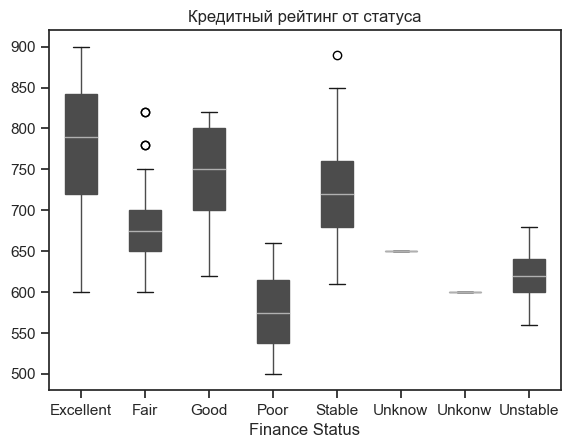

In [40]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Credit Score', by='Finance Status', grid=False, patch_artist=True)
plt.title('Кредитный рейтинг от статуса')

plt.suptitle('')
plt.show()